# Loading the data

In [1]:
import numpy as np
import pandas as pd
import pylab as plt
import seaborn as sns
import sklearn

import nltk, re
from nltk.corpus import stopwords

data_dir='./dataset/'

In [2]:
df = pd.read_csv(data_dir+'train.csv')

In [3]:
df.head(2)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0


In [4]:
print ("The Columns:", df.columns.values)

The Columns: ['id' 'comment_text' 'toxic' 'severe_toxic' 'obscene' 'threat' 'insult'
 'identity_hate']


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
 8   label_sum      159571 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 11.0+ MB


In [5]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Print Random Comments

In [10]:
target_columns = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']

print ("Some random texts with their labels.\n## Print Random Comments")

np.random.seed(8848)

for i in np.random.randint(0, 100000, 5):
    text = df['comment_text'].values[i]
    labs = df[target_columns].values[i]
    print ("Comment:\n", text[:200]+' ...', "\nLabel:", labs ,"\n\n")

Some random texts with their labels.
## Print Random Comments
Comment:
 Wikipedblack people are stupid ia ... 
Label: [1 0 0 0 0 0] 


Comment:
 "

Welcome!

Hello, , and welcome to Wikipedia!  I hope you like the place and decide to stay. Unfortunately, one or more of the pages you created may not conform to some of Wikipedia's guidelines for ... 
Label: [0 0 0 0 0 0] 


Comment:
 "
I don't think it is pertinent. April 15 is also the anniversary of the Belfast Blitz and many other things, but there is no clear connection between this event and any of that other stuff, including ... 
Label: [0 0 0 0 0 0] 


Comment:
 No problem, however only the UEFA EUROPA LEAGUE trophy and the INTERCONTINETAL trophy works. The CHAMPIONS LEAGUE and the INTERTOTO trophies do not take me to the same page the other two do, which doe ... 
Label: [0 0 0 0 0 0] 


Comment:
 change the title 

this is more than an arrest, this has touch the life of many minorities. Plain and simple. ... 
Label: [0 0 0 0 0 0]

## Data type

In [11]:
for col in target_columns:
    print (col, "\tunique values:", df[col].unique() )## Data shape and distribution

toxic 	unique values: [0 1]
severe_toxic 	unique values: [0 1]
obscene 	unique values: [0 1]
threat 	unique values: [0 1]
insult 	unique values: [0 1]
identity_hate 	unique values: [0 1]


## Data shape and distribution

In [12]:
print (f"df.shape={df.shape}")

df.shape=(159571, 8)


In [13]:
for col in target_columns:
    print (col, df[col].sum())

toxic 15294
severe_toxic 1595
obscene 8449
threat 478
insult 7877
identity_hate 1405


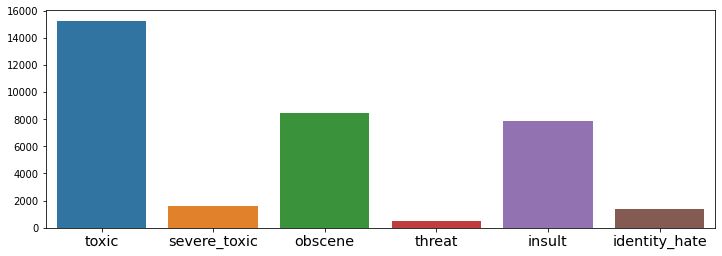

In [14]:
class_sum = [df[col].sum() for col in target_columns]

fig, ax = plt.subplots(1,1, figsize=(12,4))
sns.barplot(x=target_columns, y=class_sum, ax=ax)
ax.set_xticklabels(target_columns, fontsize='x-large');

There appears to be a huge class imbalance. Don't worry too much about it at the moment. Work on some models first and come back to see if we can do something about it.

Let's also check how the label themselves are correlated

In [50]:
corr_matrix = df[target_columns].corr()
corr_matrix 

,toxic,severe_toxic,obscene,threat,insult,identity_hate
toxic,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
severe_toxic,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
obscene,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
insult,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
identity_hate,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


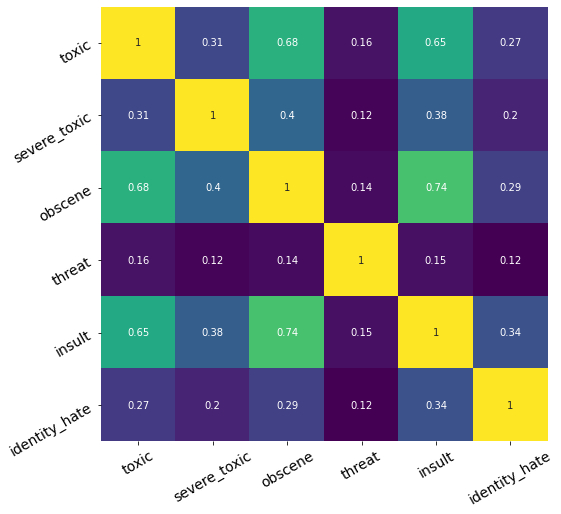

In [66]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
sns.heatmap(corr_matrix, cmap='viridis', annot=True, cbar=False);
ax.tick_params(axis='both', which='major', labelsize=14, rotation=30)


In [15]:
df['label_sum'] = df['toxic']+df['severe_toxic']+df['obscene']+df['threat']+df['insult']+df['identity_hate']

In [16]:
df.head(2)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,label_sum
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0


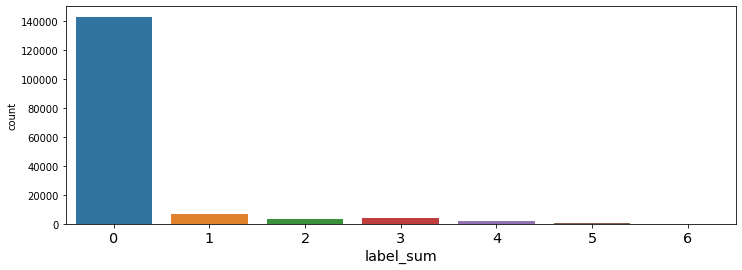

In [17]:
fig, ax = plt.subplots(1,1,figsize=(12,4));
sns.countplot(df['label_sum'], ax=ax);
plt.xticks(fontsize='x-large');
plt.xlabel('label_sum', fontsize='x-large');

In [18]:
non_toxic = df[df['label_sum']==0].shape[0]
non_toxic_frac = 100*non_toxic/df.shape[0]

print (f"Toxic labelled comments fraction = {round(non_toxic_frac, 2)}%")
print (f"Non-toxic labelled comments fraction = {round(100-non_toxic_frac, 2)}%")

Toxic labelled comments fraction = 89.83%
Non-toxic labelled comments fraction = 10.17%


Again a huge imbalance between toxic labelled comments vs non labeled. We may have to use Neural Net for this.

# Word Cloud

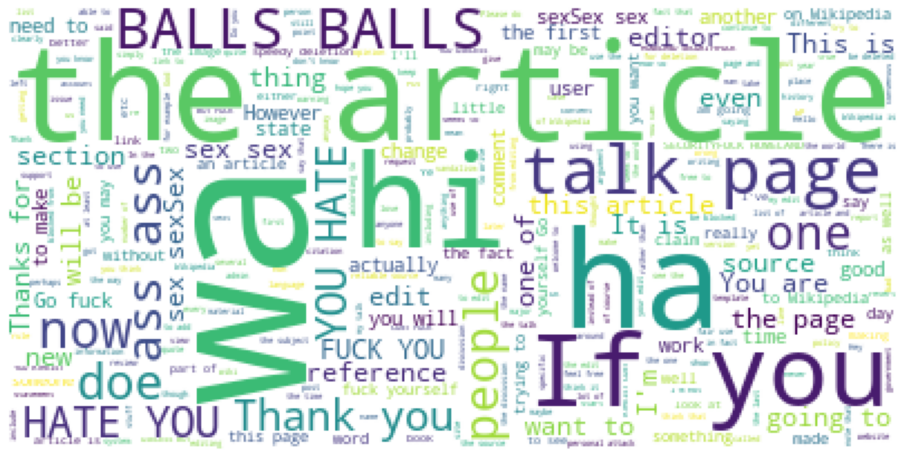

In [19]:
from wordcloud import WordCloud, STOPWORDS

def PlotWordCloud(df, col):
    stopwords_ = set(STOPWORDS)
    wordcloud = WordCloud(background_color='white',
                          max_words=1000,
                          stopwords=stopwords_).generate(" ".join([com for com in df[col]]))

    plt.figure(figsize=(16,10),edgecolor='blue')
    plt.imshow(wordcloud, cmap='plasma')
    plt.axis("off")

PlotWordCloud(df[:10000], 'comment_text')

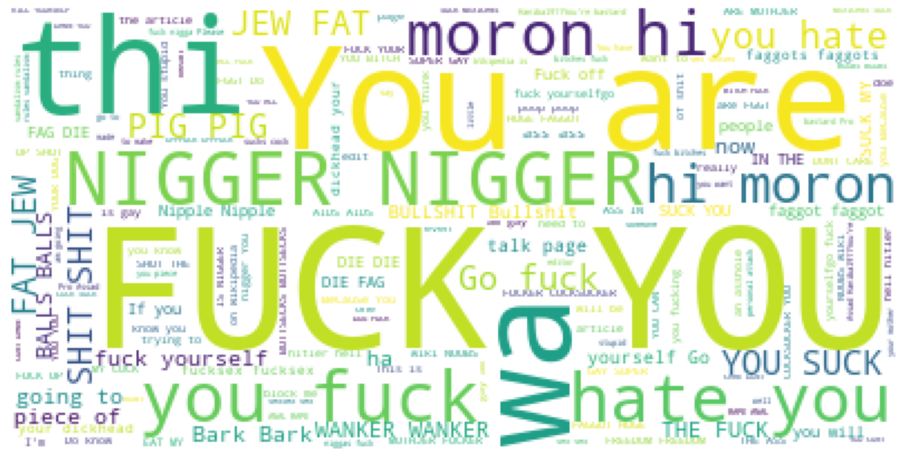

In [20]:
# Let's plot the wordcloud only with toxic comments.
PlotWordCloud(df[df['label_sum']!=0], 'comment_text')

### Most used words in the Toxic comments

In [21]:
from collections import Counter
STOPWORDS = set(stopwords.words('english'))
words_in_toxic_coms = [word for com in df[df['label_sum']!=0]['comment_text'].values for word in com.lower().split() if word not in STOPWORDS ]


Top 10 most common words: [('fuck', 8364), ('like', 3648), ('"', 3590), ('nigger', 3227), ('fucking', 3204), ('suck', 2883), ('go', 2857), ('shit', 2729), ('hate', 2606), ('u', 2548)]


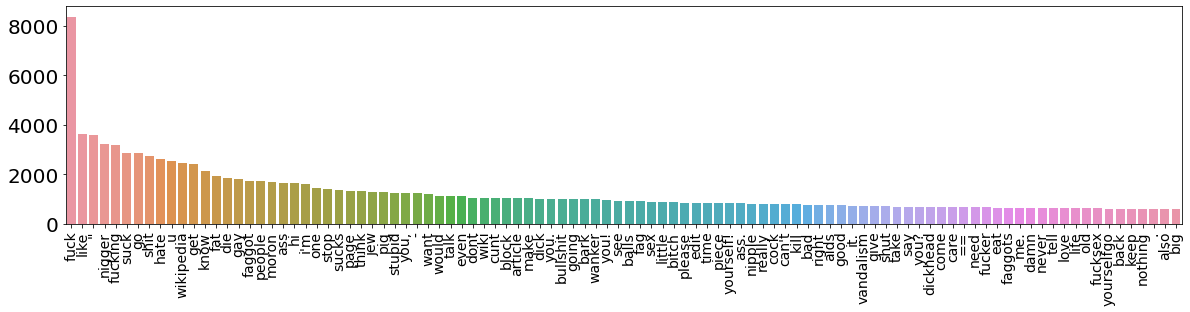

In [45]:
def plot_common_words(words_list, topN=100, ax=None):    
    word_counter=Counter(words_list)
    most_common = word_counter.most_common(topN)
    ks = [kv_pair[0] for kv_pair in most_common]
    vs = [kv_pair[1] for kv_pair in most_common]

    print ("Top 10 most common words:", most_common[:10] )
    
    if ax is None:
        fig, ax = plt.subplots(1,1,figsize=(20,4));
    
    sns.barplot(x=ks, y=vs, ax=ax);
    ax.tick_params(axis='x', which='major', labelsize=14, rotation=90)
    ax.tick_params(axis='y', which='major', labelsize=20)
    
plot_common_words(words_in_toxic_coms)

There are quiet a lot of repetition of words like 'F\*\*k' and 'F\*\*king'. So, let's stemmize the words.

Top 10 most common words: [('fuck', 11755), ('suck', 4376), ('go', 3864), ('like', 3833), ('"', 3590), ('nigger', 3337), ('get', 2800), ('shit', 2752), ('hate', 2720), ('u', 2548)]


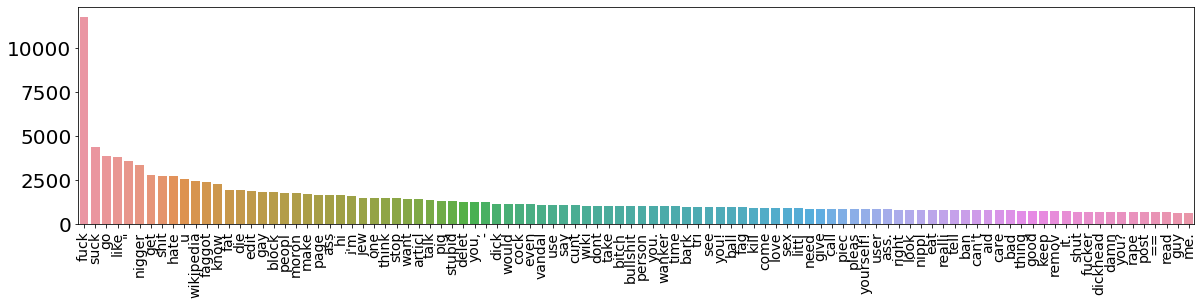

In [46]:
from nltk.stem.porter import PorterStemmer

p_stemmer = PorterStemmer()
words_in_toxic_coms_stem = [p_stemmer.stem(word) for com in df[df['label_sum']!=0]['comment_text'].values for word in com.lower().split() if word not in STOPWORDS ]
plot_common_words(words_in_toxic_coms_stem)

Top 10 most common words: [('fuck', 8364), ('like', 3648), ('"', 3590), ('nigger', 3227), ('fucking', 3204), ('suck', 2883), ('go', 2857), ('shit', 2729), ('hate', 2606), ('u', 2548)]
Top 10 most common words: [('fuck', 11755), ('suck', 4376), ('go', 3864), ('like', 3833), ('"', 3590), ('nigger', 3337), ('get', 2800), ('shit', 2752), ('hate', 2720), ('u', 2548)]


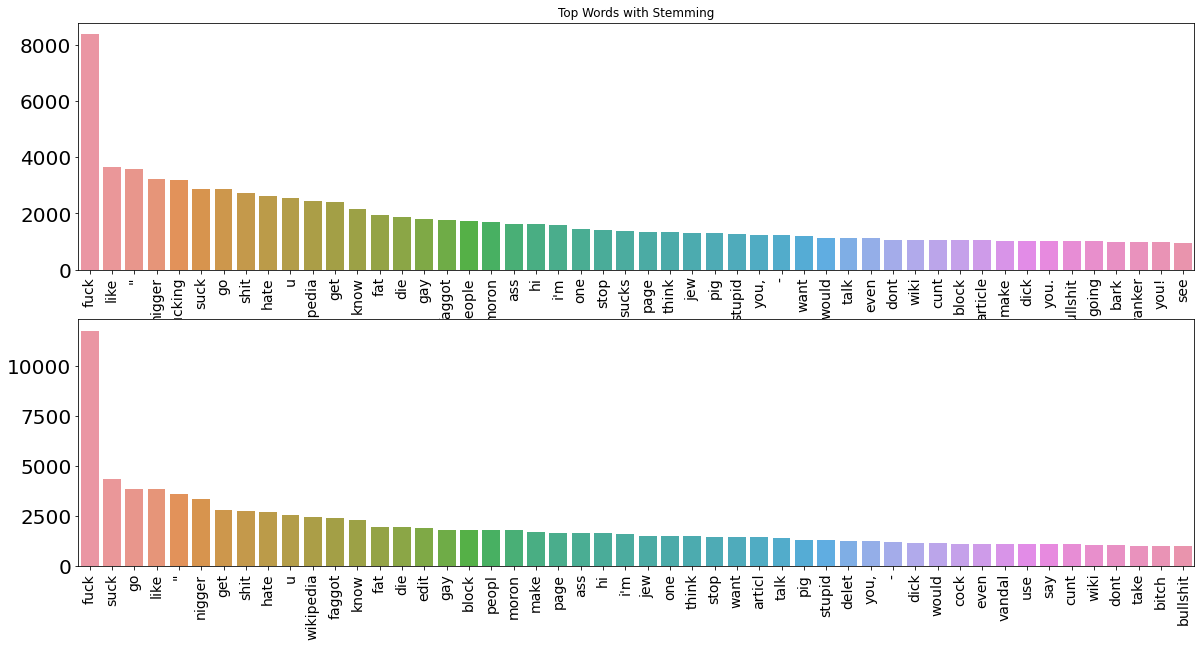

In [47]:

fig, ax = plt.subplots(2,1,figsize=(20,10));
ax[0].set_title("Top Words without Stemming", fontsize=20)
plot_common_words(words_in_toxic_coms, topN=50, ax=ax[0])

ax[0].set_title("Top Words with Stemming")
plot_common_words(words_in_toxic_coms_stem, topN=50, ax=ax[1])

## Text preprocessing

In [ ]:

def text_prepare(text):
    text = text.lower() # lowercase text
    text = re.sub(r'https?://\S+', ' ', text)# Replace URLs with a space
    text = re.sub(r'\$\S+', ' ', text)       # Replace ticker symbols with a space
    text = re.sub(r'\@\S+', ' ', text)       # Replace StockTwits usernames with a space.
    text = re.sub(r'[^a-zA-Z]', ' ', text)   # Replace everything not a letter with a space        
    text = ' '.join([word for word in text.split() if word not in STOPWORDS]) # delete stopwors from text
    return text

df['text_processed'] = df['comment_text'].apply(text_prepare)

In [ ]:
df.head(5)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

def prepare_TFIDF(df, col):
    df_train, df_test = train_test_split(df, test_size=0.2, random_state = 8848)
    
    vectorizer = TfidfVectorizer(use_idf=True, max_df=0.95)
    vectorizer.fit_transform(df_train[col].values)
    
    X_train = vectorizer.transform(df_train[col].values)
    X_test  = vectorizer.transform(df_test[col].values)
    
    y_train = df_train[target_columns].values
    y_test  = df_test[target_columns].values

    return X_train, X_test, y_train, y_test, vectorizer


X_train_tf, X_test_tf, y_train_tf, y_test_tf, vectorizer= prepare_TFIDF(df, "text_processed")

In [ ]:
print("X_train Shape: ", X_train_tf.toarray().shape)
print("y_train Shape: ", y_train_tf.shape)

In [ ]:
from sklearn.linear_model import LogisticRegression

model_tf = LogisticRegression(verbose=1, solver='liblinear',
                           random_state=8848, max_iter=500)
model_tf.fit(X_train_tf, y_train_tf)